In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("F:\projects\Classifying Restaurant Review Sentimen\Restaurant_Reviews.tsv",sep='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1000, 2)

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.duplicated().sum()

4

In [8]:
df1 = df.drop_duplicates()

In [9]:
df1.duplicated().sum()

0

In [10]:
df1.shape

(996, 2)

In [11]:
df1.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
df1['char_count'] = df1['Review'].apply(len)

In [13]:
df1.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [14]:
df1['word_count'] = df1['Review'].apply(lambda x : len(str(x).split()))

In [15]:
df1.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df1['sent_count'] = df1['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [19]:
df1.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [20]:
df1[df1['Liked']==1]['char_count'].mean()

55.95591182364729

In [21]:
df1[df1['Liked']==0]['char_count'].mean()

60.9738430583501

In [22]:
import re

In [23]:
df1['Review'][0]

'Wow... Loved this place.'

In [24]:
review = re.sub('[^a-zA-Z]',' ',df1['Review'][1])

In [25]:
review = review.lower()

In [26]:
review

'crust is not good '

In [27]:
review = review.split()

In [28]:
review

['crust', 'is', 'not', 'good']

In [29]:
from nltk.corpus import stopwords

In [30]:
all_stopword = stopwords.words('english')
all_stopword.remove('not')

In [31]:
review =  [word for word in review if word not in set(all_stopword)]

In [32]:
review

['crust', 'not', 'good']

In [33]:
from nltk.stem.porter import PorterStemmer

In [34]:
ps =PorterStemmer()

In [35]:
review = [ps.stem(word) for word in review]

In [36]:
review = ' '.join(review)

In [37]:
review

'crust not good'

In [41]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords

for i in range(len(df1)):
    review = re.sub('[^a-zA-Z]',' ',df1['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)


In [40]:
df1 = df1.reset_index(drop=True)

In [42]:
df1['processed_text']=corpus

In [43]:
df1.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [44]:
from wordcloud import WordCloud

In [46]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color='black')

In [49]:
pos = wc.generate(df1[df1['Liked']==1]['processed_text'].str.cat(sep=' '))

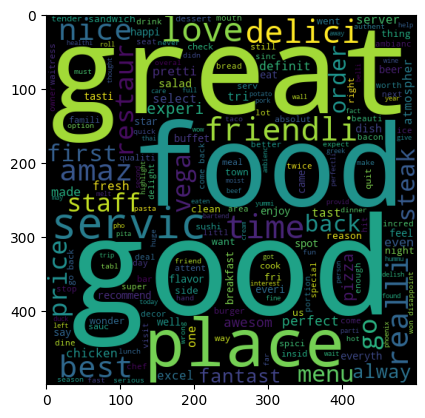

In [50]:
plt.imshow(pos)
plt.show()

In [51]:
neg = wc.generate(df1[df1['Liked']==0]['processed_text'].str.cat(sep=' '))

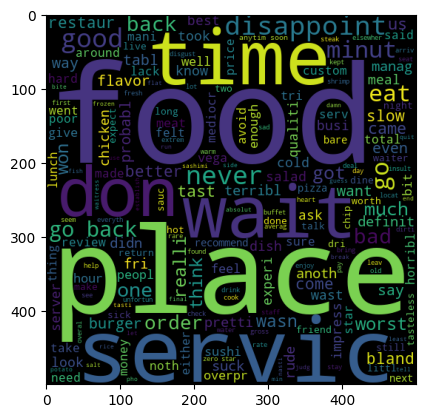

In [52]:
plt.imshow(neg)
plt.show()

In [53]:
df1.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv= CountVectorizer(max_features=1500)

In [61]:
x = cv.fit_transform(corpus).toarray()

In [62]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
x.shape

(996, 1500)

In [64]:
y = df1['Liked']

In [65]:
y

0      1
1      0
2      0
3      1
4      1
      ..
991    0
992    0
993    0
994    0
995    0
Name: Liked, Length: 996, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test,y_pred)

0.64

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy_score(y_test,y_pred1)

0.805

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)
accuracy_score(y_test,y_pred2)


0.815

In [90]:

user = input('Write your view:')

review = re.sub('[^a-zA-Z]',' ',(user))
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if word not in stop_words]
review = ' '.join(review)
review = cv.transform([review]).toarray()
result = rf.predict(review)

if result==1:
    print('Positive comment')
else:
    print('Negative comment')

Positive comment


In [81]:
df['Review'][34]

'Overall, I like this place a lot.'

In [89]:
df.iloc[34,:]

Review    Overall, I like this place a lot.
Liked                                     1
Name: 34, dtype: object